In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [5]:
data=pd.read_csv('Lenditt/german_credit_data.csv')
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [8]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [6]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

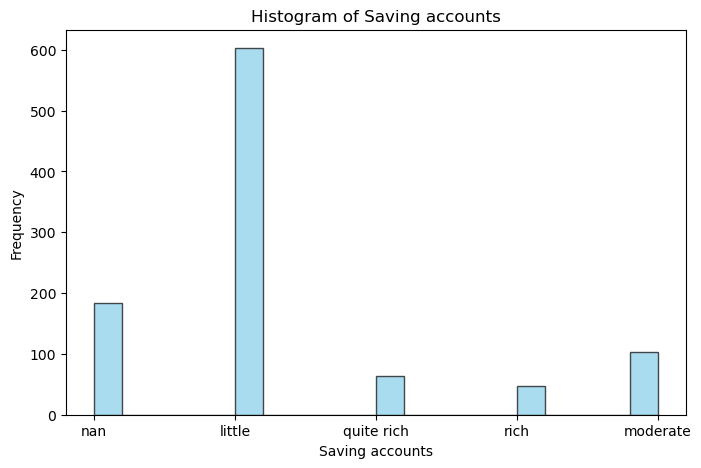

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(df['Saving accounts'].astype(str), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

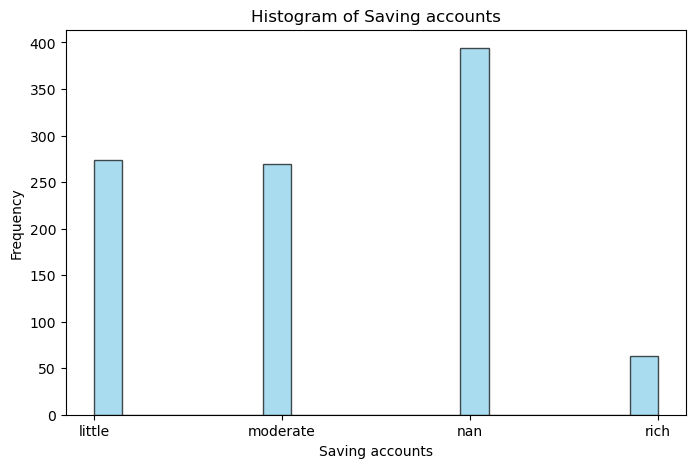

In [15]:
plt.figure(figsize=(8, 5))
plt.hist(df['Checking account'].astype(str), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

In [17]:
mode_value_1 = df['Saving accounts'].mode()[0]  # Calculate the mode
df['Saving accounts'] = df['Saving accounts'].fillna(mode_value_1)
mode_value_2 = df['Checking account'].mode()[0]
df['Checking account'] =  df['Checking account'].fillna(mode_value_2)

In [18]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [19]:
from urllib.request import urlretrieve
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', 'german.data')

('german.data', <http.client.HTTPMessage at 0x1ed19742990>)

In [36]:
german_df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', delimiter=' ',header=None)
german_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [38]:
urlretrieve('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc', 'german.doc')
f = open('german.doc')
german_doc= f.read()
print(german_doc)

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  
Von-Melle-Park 5    
2000 Hamburg 13 

3. Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   
 
For algorithms that need numerical attributes, Strathclyde University 
produced the file "german.data-numeric".  This file has been edited 
and several indicator variables added to make it suitable for 
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


6. Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


7.  Attribute d

In [39]:
german_df.columns=['account_bal','duration','payment_status','purpose',
                   'credit_amount','savings_bond_value','employed_since',
                   'intallment_rate','sex_marital','guarantor','residence_since',
                   'most_valuable_asset','age','concurrent_credits','type_of_housing',
                   'number_of_existcr','job','number_of_dependents','telephon',
                   'foreign','target']
german_df= german_df.replace(['A11','A12','A13','A14', 'A171','A172','A173','A174','A121','A122','A123','A124'],
                  ['neg_bal','positive_bal','positive_bal','no_acc','unskilled','unskilled','skilled','highly_skilled',
                   'none','car','life_insurance','real_estate'])

In [40]:
german_df

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,...,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target
0,neg_bal,6,A34,A43,1169,A65,A75,4,A93,A101,...,none,67,A143,A152,2,skilled,1,A192,A201,1
1,positive_bal,48,A32,A43,5951,A61,A73,2,A92,A101,...,none,22,A143,A152,1,skilled,1,A191,A201,2
2,no_acc,12,A34,A46,2096,A61,A74,2,A93,A101,...,none,49,A143,A152,1,unskilled,2,A191,A201,1
3,neg_bal,42,A32,A42,7882,A61,A74,2,A93,A103,...,car,45,A143,A153,1,skilled,2,A191,A201,1
4,neg_bal,24,A33,A40,4870,A61,A73,3,A93,A101,...,real_estate,53,A143,A153,2,skilled,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_acc,12,A32,A42,1736,A61,A74,3,A92,A101,...,none,31,A143,A152,1,unskilled,1,A191,A201,1
996,neg_bal,30,A32,A41,3857,A61,A73,4,A91,A101,...,car,40,A143,A152,1,highly_skilled,1,A192,A201,1
997,no_acc,12,A32,A43,804,A61,A75,4,A93,A101,...,life_insurance,38,A143,A152,1,skilled,1,A191,A201,1
998,neg_bal,45,A32,A43,1845,A61,A73,4,A93,A101,...,real_estate,23,A143,A153,1,skilled,1,A192,A201,2


In [41]:
german_df.isna().any().any()

False

In [42]:
german_df.isnull().sum()

account_bal             0
duration                0
payment_status          0
purpose                 0
credit_amount           0
savings_bond_value      0
employed_since          0
intallment_rate         0
sex_marital             0
guarantor               0
residence_since         0
most_valuable_asset     0
age                     0
concurrent_credits      0
type_of_housing         0
number_of_existcr       0
job                     0
number_of_dependents    0
telephon                0
foreign                 0
target                  0
dtype: int64

In [43]:
le= LabelEncoder()
le.fit(german_df.target)
german_df.target=le.transform(german_df.target)
german_df.target.head(5)

0    0
1    1
2    0
3    0
4    1
Name: target, dtype: int64

In [44]:
german_df.head()

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,...,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target
0,neg_bal,6,A34,A43,1169,A65,A75,4,A93,A101,...,none,67,A143,A152,2,skilled,1,A192,A201,0
1,positive_bal,48,A32,A43,5951,A61,A73,2,A92,A101,...,none,22,A143,A152,1,skilled,1,A191,A201,1
2,no_acc,12,A34,A46,2096,A61,A74,2,A93,A101,...,none,49,A143,A152,1,unskilled,2,A191,A201,0
3,neg_bal,42,A32,A42,7882,A61,A74,2,A93,A103,...,car,45,A143,A153,1,skilled,2,A191,A201,0
4,neg_bal,24,A33,A40,4870,A61,A73,3,A93,A101,...,real_estate,53,A143,A153,2,skilled,2,A191,A201,1


In [46]:
german_df.columns

Index(['account_bal', 'duration', 'payment_status', 'purpose', 'credit_amount',
       'savings_bond_value', 'employed_since', 'intallment_rate',
       'sex_marital', 'guarantor', 'residence_since', 'most_valuable_asset',
       'age', 'concurrent_credits', 'type_of_housing', 'number_of_existcr',
       'job', 'number_of_dependents', 'telephon', 'foreign', 'target'],
      dtype='object')

In [59]:
german_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   account_bal           1000 non-null   object
 1   duration              1000 non-null   int64 
 2   payment_status        1000 non-null   object
 3   purpose               1000 non-null   object
 4   credit_amount         1000 non-null   int64 
 5   savings_bond_value    1000 non-null   object
 6   employed_since        1000 non-null   object
 7   intallment_rate       1000 non-null   int64 
 8   sex_marital           1000 non-null   object
 9   guarantor             1000 non-null   object
 10  residence_since       1000 non-null   int64 
 11  most_valuable_asset   1000 non-null   object
 12  age                   1000 non-null   int64 
 13  concurrent_credits    1000 non-null   object
 14  type_of_housing       1000 non-null   object
 15  number_of_existcr     1000 non-null   i

In [60]:
german_df.head()

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,...,most_valuable_asset,age,concurrent_credits,type_of_housing,number_of_existcr,job,number_of_dependents,telephon,foreign,target
0,neg_bal,6,A34,A43,1169,A65,A75,4,A93,A101,...,none,67,A143,A152,2,skilled,1,A192,A201,0
1,positive_bal,48,A32,A43,5951,A61,A73,2,A92,A101,...,none,22,A143,A152,1,skilled,1,A191,A201,1
2,no_acc,12,A34,A46,2096,A61,A74,2,A93,A101,...,none,49,A143,A152,1,unskilled,2,A191,A201,0
3,neg_bal,42,A32,A42,7882,A61,A74,2,A93,A103,...,car,45,A143,A153,1,skilled,2,A191,A201,0
4,neg_bal,24,A33,A40,4870,A61,A73,3,A93,A101,...,real_estate,53,A143,A153,2,skilled,2,A191,A201,1


In [62]:
from sklearn.preprocessing import LabelEncoder
import joblib 
encoder = LabelEncoder()

german_df['account_bal_encoded']=encoder.fit_transform(german_df['account_bal'])
german_df['payment_status_encode']=encoder.fit_transform(german_df['payment_status'])
german_df['puurpose_encoded']=encoder.fit_transform(german_df['purpose'])
german_df['savings_bond_values_encoded']=encoder.fit_transform(german_df['savings_bond_value'])
german_df['employed_since_encoded']=encoder.fit_transform(german_df['employed_since'])
german_df['sex_marital_encoded']=encoder.fit_transform(german_df['sex_marital'])
german_df['guarantor_encoded']=encoder.fit_transform(german_df['guarantor'])
german_df['most_valuable_asse_encoded']=encoder.fit_transform(german_df['most_valuable_asset'])
german_df['concurrent_credits_encoded']=encoder.fit_transform(german_df['concurrent_credits'])
german_df['type_of_housing_encoded']=encoder.fit_transform(german_df['type_of_housing'])
german_df['job_encoded']=encoder.fit_transform(german_df['job'])
german_df['telephon_encoded']=encoder.fit_transform(german_df['telephon'])
german_df['foreign_encoded']=encoder.fit_transform(german_df['foreign'])


joblib.dump(encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [63]:
german_df

,account_bal,duration,payment_status,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,...,savings_bond_values_encoded,employed_since_encoded,sex_marital_encoded,guarantor_encoded,most_valuable_asse_encoded,concurrent_credits_encoded,type_of_housing_encoded,job_encoded,telephon_encoded,foreign_encoded
0,neg_bal,6,A34,A43,1169,A65,A75,4,A93,A101,...,4,4,2,0,2,2,1,1,1,0
1,positive_bal,48,A32,A43,5951,A61,A73,2,A92,A101,...,0,2,1,0,2,2,1,1,0,0
2,no_acc,12,A34,A46,2096,A61,A74,2,A93,A101,...,0,3,2,0,2,2,1,2,0,0
3,neg_bal,42,A32,A42,7882,A61,A74,2,A93,A103,...,0,3,2,2,0,2,2,1,0,0
4,neg_bal,24,A33,A40,4870,A61,A73,3,A93,A101,...,0,2,2,0,3,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_acc,12,A32,A42,1736,A61,A74,3,A92,A101,...,0,3,1,0,2,2,1,2,0,0
996,neg_bal,30,A32,A41,3857,A61,A73,4,A91,A101,...,0,2,0,0,0,2,1,0,1,0
997,no_acc,12,A32,A43,804,A61,A75,4,A93,A101,...,0,4,2,0,1,2,1,1,0,0
998,neg_bal,45,A32,A43,1845,A61,A73,4,A93,A101,...,0,2,2,0,3,2,2,1,1,0


In [77]:
drop_cols=['account_bal','payment_status','purpose','savings_bond_value','employed_since','sex_marital','guarantor','most_valuable_asset','concurrent_credits','type_of_housing','job','telephon','foreign']
german_df=german_df.drop(drop_cols,axis=1)

In [78]:
german_df=german_df[['account_bal_encoded', 'duration', 'payment_status_encode', 'puurpose_encoded', 'credit_amount',
       'savings_bond_values_encoded', 'employed_since_encoded', 'intallment_rate',
       'sex_marital_encoded', 'guarantor_encoded', 'residence_since', 'most_valuable_asse_encoded',
       'age', 'concurrent_credits_encoded', 'type_of_housing_encoded', 'number_of_existcr',
       'job_encoded', 'number_of_dependents', 'telephon_encoded', 'foreign_encoded', 'target']]

In [79]:
german_df

,account_bal_encoded,duration,payment_status_encode,puurpose_encoded,credit_amount,savings_bond_values_encoded,employed_since_encoded,intallment_rate,sex_marital_encoded,guarantor_encoded,...,most_valuable_asse_encoded,age,concurrent_credits_encoded,type_of_housing_encoded,number_of_existcr,job_encoded,number_of_dependents,telephon_encoded,foreign_encoded,target
0,0,6,4,4,1169,4,4,4,2,0,...,2,67,2,1,2,1,1,1,0,0
1,2,48,2,4,5951,0,2,2,1,0,...,2,22,2,1,1,1,1,0,0,1
2,1,12,4,7,2096,0,3,2,2,0,...,2,49,2,1,1,2,2,0,0,0
3,0,42,2,3,7882,0,3,2,2,2,...,0,45,2,2,1,1,2,0,0,0
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,12,2,3,1736,0,3,3,1,0,...,2,31,2,1,1,2,1,0,0,0
996,0,30,2,1,3857,0,2,4,0,0,...,0,40,2,1,1,0,1,1,0,0
997,1,12,2,4,804,0,4,4,2,0,...,1,38,2,1,1,1,1,0,0,0
998,0,45,2,4,1845,0,2,4,2,0,...,3,23,2,2,1,1,1,1,0,1


# Prediciton

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [86]:
X=german_df.drop('target',axis=1)
y=german_df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Random Forest Classifier

In [87]:
rf_classifier=RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
rf_pred=rf_classifier.predict(X_test)
rf_accuracy=accuracy_score(y_test,rf_pred)
rf_accuracy

0.735

In [91]:
feature_importances = rf_classifier.feature_importances_
for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"{feature_name}: {importance:.{3}}")

account_bal_encoded: 0.0738
duration: 0.104
payment_status_encode: 0.0691
puurpose_encoded: 0.065
credit_amount: 0.134
savings_bond_values_encoded: 0.0479
employed_since_encoded: 0.0512
intallment_rate: 0.0405
sex_marital_encoded: 0.0375
guarantor_encoded: 0.019
residence_since: 0.0385
most_valuable_asse_encoded: 0.0461
age: 0.116
concurrent_credits_encoded: 0.0328
type_of_housing_encoded: 0.0282
number_of_existcr: 0.0255
job_encoded: 0.0336
number_of_dependents: 0.0136
telephon_encoded: 0.0197
foreign_encoded: 0.00411


### Naive bayer's

In [90]:
nb_classifier=GaussianNB()
nb_classifier.fit(X_train,y_train)
nb_pred=nb_classifier.predict(X_test)
nb_accuracy=accuracy_score(y_test,nb_pred)
nb_accuracy

0.745

In [100]:
feature_means = nb_classifier.theta_

# Iterate through features and their mean values
for feature_name, means in zip(X_train.columns, feature_means.T):
    print(f"Feature: {feature_name}")
    for class_idx, mean_value in enumerate(means):
        print(f"  Class {class_idx}: Mean = {mean_value:.3f}")


Feature: account_bal_encoded
  Class 0: Mean = 1.108
  Class 1: Mean = 0.983
Feature: duration
  Class 0: Mean = 19.113
  Class 1: Mean = 24.359
Feature: payment_status_encode
  Class 0: Mean = 2.735
  Class 1: Mean = 2.154
Feature: puurpose_encoded
  Class 0: Mean = 3.230
  Class 1: Mean = 3.209
Feature: credit_amount
  Class 0: Mean = 2992.576
  Class 1: Mean = 3883.846
Feature: savings_bond_values_encoded
  Class 0: Mean = 1.256
  Class 1: Mean = 0.701
Feature: employed_since_encoded
  Class 0: Mean = 2.470
  Class 1: Mean = 2.154
Feature: intallment_rate
  Class 0: Mean = 2.920
  Class 1: Mean = 3.077
Feature: sex_marital_encoded
  Class 0: Mean = 1.740
  Class 1: Mean = 1.632
Feature: guarantor_encoded
  Class 0: Mean = 0.177
  Class 1: Mean = 0.120
Feature: residence_since
  Class 0: Mean = 2.823
  Class 1: Mean = 2.842
Feature: most_valuable_asse_encoded
  Class 0: Mean = 1.346
  Class 1: Mean = 1.397
Feature: age
  Class 0: Mean = 36.302
  Class 1: Mean = 33.556
Feature: concur

In [109]:
from sklearn import svm

In [104]:
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)


SVC()

In [108]:
svm_pred=svm_model.predict(X_test)
svm_acc= accuracy_score(y_test,svm_pred)
svm_acc

0.685

## Parameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),X_train,y_train,cv=5)

In [ ]:
crosss_val_score(svm.SVC(kernel='rbf',C=10,,gamma='auto'),X_train,y_train,cv=5)

In [ ]:
from sklearn.model_selection import GridSearchCV
kernels=['rbf','linear']
C=[1,10,20]
avg_score={}
for kval in kernels:
    for cval in C:
        cv_scores=cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),X_train,y_train,cv=5)
